# TITANIC ML DATASET(KAGGLE COMPETITION)

### In this notebook, I have made an attempt to predict whether or not a passenger has survived the Titanic disaster with the help of ML Classification. With the following code implementation, a best score of 0.81100 was achieved for Titanic Survival Kaggle Competition ( which helped me get a rank in between 800-1000).

# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the datasets

In [2]:
train = pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\train.csv')
test = pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')

In [3]:
train_len = len(train)

# Let's first consider Training Data


## Nan values in the Training Set

In [4]:
#percentage of nan values present in each feature
features_nan=[feature for feature in train.columns if train[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, np.round(train[feature].isnull().mean()*100, 2),  ' % missing values')

Age 19.87  % missing values
Cabin 77.1  % missing values
Embarked 0.22  % missing values


## observe numeric and categorical values separately 

In [5]:
num = train[['Age','SibSp','Parch','Fare']]
cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
#num, #cat

# Exploratory Data Analysis

## Distributions of Variables in Training Datasets

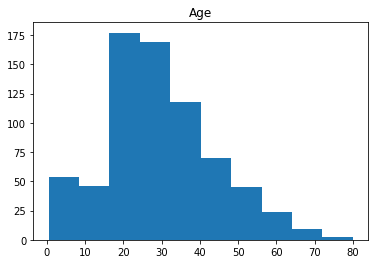

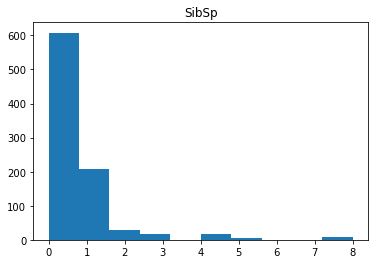

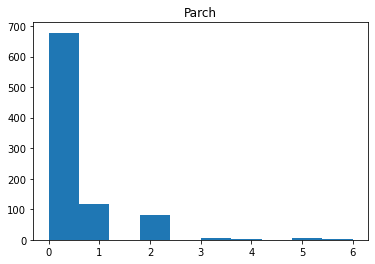

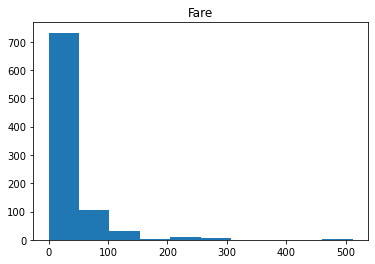

In [6]:
#distributions for all numeric variables 
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.show()

In [7]:
print(num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [8]:
#compare survival rate across Age, SibSp, Parch, and Fare 
#pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

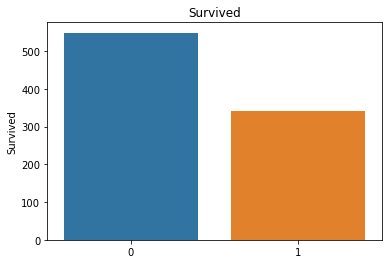

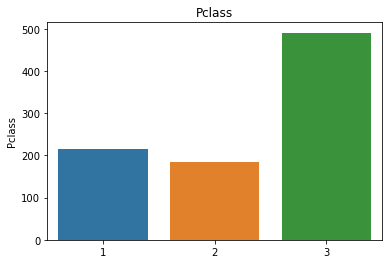

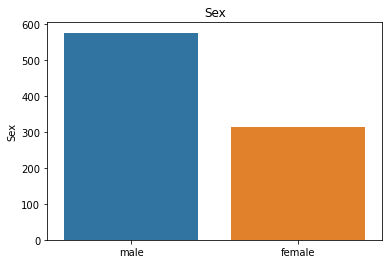

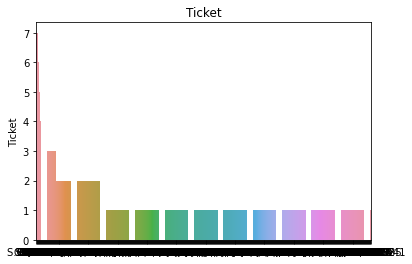

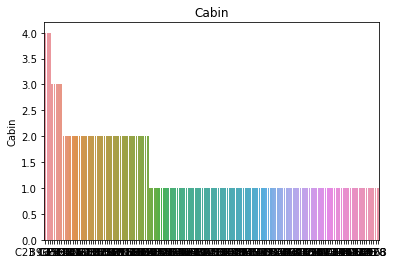

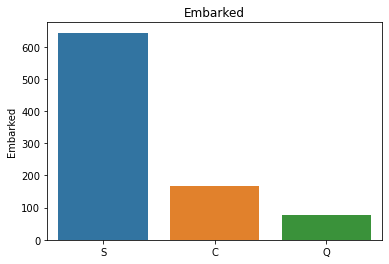

In [9]:
for i in cat.columns:
    sns.barplot(cat[i].value_counts().index,cat[i].value_counts()).set_title(i)
    plt.show()

## Comparing survival for low cardinality categorical variables 

In [10]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Taking care of Cabin Variable 

## Creating a Deck variable from Cabin Variable

In [11]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
train['Deck'] = train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
train.Deck.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [12]:
train_deck = train.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 
                                                                        'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
train_deck

Deck     A   B   C   D      E        F     G   M            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

In [13]:
# Passenger in the T deck is changed to A
idx = train[train['Deck'] == 'T'].index
train.loc[idx, 'Deck'] = 'A'

In [14]:
train_survived = train.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass',
                                                                                   'Cabin', 'PassengerId', 
                                                                                   'Ticket']).rename(columns={'Name':'Count'}).transpose()
train_survived

Deck      A      B       C      D      E      F     G       M     
Survived  0  1   0   1   0   1  0   1  0   1  0  1  0  1    0    1
Count     9  7  12  35  24  35  8  25  8  24  5  8  2  2  481  206

In [15]:
pd.pivot_table(train,index='Survived',columns='Deck', values = 'Name', aggfunc='count')

Deck,A,B,C,D,E,F,G,M
Survived,,,,,,,,
0,9,12,24,8,8,5,2,481
1,7,35,35,25,24,8,2,206


In [16]:
deck_mapping = {"A": 1, "B": 2, "C": 3, "D": 4,"E": 5,"F": 6,"G": 7,"M": 8 }
train['Deck'] = train['Deck'].map(deck_mapping)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8


# Let's consider Test Data

In [18]:
#percentage of nan values present in each feature
features_nan=[feature for feature in test.columns if train[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, np.round(test[feature].isnull().mean()*100, 2),  ' % missing values')

Age 20.57  % missing values
Cabin 78.23  % missing values
Embarked 0.0  % missing values


In [19]:
test['Deck'] = test['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
test.Deck.unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [20]:
test_deck = test.groupby(['Deck', 'Pclass']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 
                                                                        'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
test_deck

Deck    A   B   C   D     E  F     G   M         
Pclass  1   1   1   1  2  1  2  3  3   1   2    3
Count   7  18  35  11  2  9  5  3  1  27  86  214

In [21]:
deck_mapping = {"A": 1, "B": 2, "C": 3, "D": 4,"E": 5,"F": 6,"G": 7,"M": 8 }
test['Deck'] = test['Deck'].map(deck_mapping)

In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,8
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,8
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,8


# Feature Engineering and taking care of missing values

In [23]:
dataset = pd.concat([train, test], sort=True).reset_index(drop=True)
dataset.head()

,Age,Cabin,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,8,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,3,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,8,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,3,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,8,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Taking care of Outliers on numerical variables of combined dataset

# 1. Age

<AxesSubplot:xlabel='Age'>

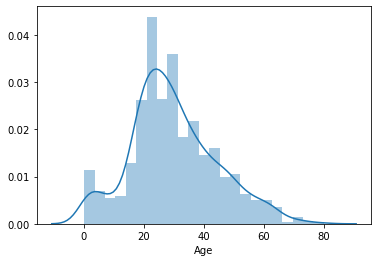

In [24]:
sns.distplot(dataset['Age'].dropna())

Text(0, 0.5, 'No of passenger')

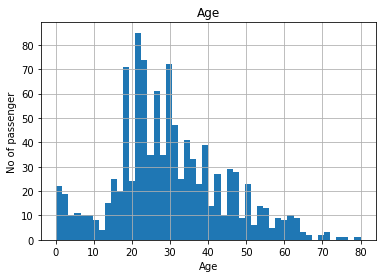

In [25]:
figure=dataset.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

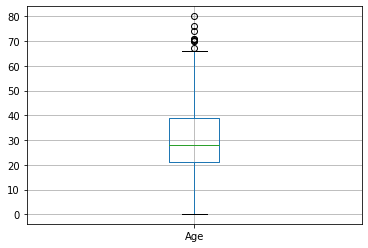

In [26]:
figure=dataset.boxplot(column="Age")

In [27]:
dataset['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [28]:
uppper_boundary=dataset['Age'].mean() + 3* dataset['Age'].std()
lower_boundary=dataset['Age'].mean() - 3* dataset['Age'].std()
print(lower_boundary), print(uppper_boundary),print(dataset['Age'].mean())

-13.359341966509948
73.12161730111798
29.881137667304014


(None, None, None)

In [29]:
dataset.loc[dataset['Age']>=73,'Age']=73

# 2.Fare

Text(0, 0.5, 'No of passenger')

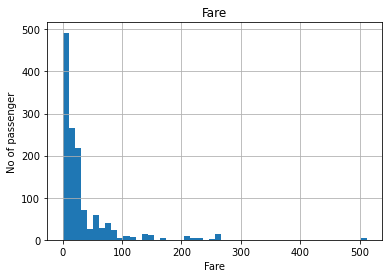

In [30]:
figure=dataset.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

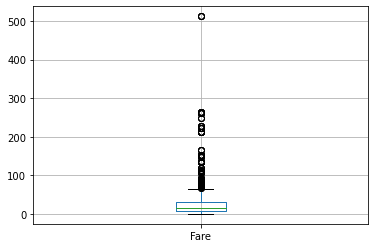

In [31]:
dataset.boxplot(column="Fare")

In [32]:
dataset['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [33]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=dataset.Fare.quantile(0.75)-dataset.Fare.quantile(0.25)

In [34]:
lower_bridge=dataset['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=dataset['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-62.24179999999999
101.4126


(None, None)

In [35]:
dataset.loc[dataset['Fare']>=100,'Fare']=101

Text(0, 0.5, 'No of passenger')

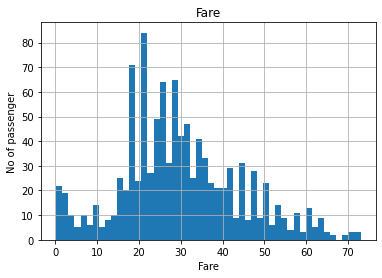

In [36]:
figure=dataset.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

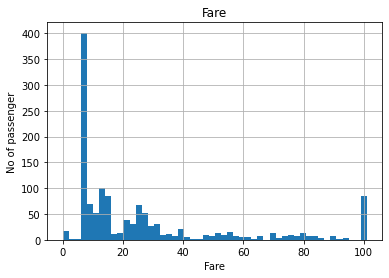

In [37]:
figure=dataset.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

## Understanding Ticket Variable

In [38]:
dataset['num_Ticket'] = dataset.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
dataset['num_Ticket'].value_counts()

1    957
0    352
Name: num_Ticket, dtype: int64

In [39]:
dataset['Ticket_letters'] = dataset.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').
                                             replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
pd.set_option("max_rows", None)
dataset['Ticket_letters'].value_counts()

0            961
pc            92
ca            68
a5            28
sotonoq       24
stono2        21
scparis       19
wc            15
a4            10
fcc            9
c              8
soc            8
sopp           7
scah           4
wep            4
pp             4
sotono2        3
fc             3
swpp           2
ppp            2
sca4           2
sc             2
fa             1
scow           1
aq3            1
aq4            1
a2             1
stonoq         1
sca3           1
sop            1
casoton        1
sp             1
lp             1
scahbasle      1
as             1
Name: Ticket_letters, dtype: int64

In [40]:
dataset.head()

,Age,Cabin,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,num_Ticket,Ticket_letters
0,22.0,NaN,8,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,a5
1,38.0,C85,3,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,0,pc
2,26.0,NaN,8,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,stono2
3,35.0,C123,3,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,0
4,35.0,NaN,8,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,0


## Since ,Cabin and Ticket have been used for creating new variables 'Deck', ['num_Ticket', & 'Ticket_letters']

# Now, we take care of the missing values

## First, create Title and Surname(Last Name) from Name

In [41]:
#extract Title from Name 
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(dataset['Title'], dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [42]:
title_mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs' }
dataset.replace({'Title': title_mapping}, inplace=True)
#titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
#dataset['Title'] = dataset['Title'].map(title_mapping)

In [43]:
#encode title variables
title_num_mapping = {"Dr": 1, "Master": 2, "Miss": 3, "Mr": 4,"Mrs": 5,"Rev": 6}
dataset['Title'] = dataset['Title'].map(title_num_mapping)

In [44]:
dataset.Title.unique()

array([4, 5, 3, 2, 6, 1], dtype=int64)

In [45]:
#dataset['Title'] = dataset['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'Countess', 'Dona'], 'Miss/Mrs/Ms')
#dataset['Title'] = dataset['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [46]:
# Extracting surnames from Name
dataset['Last_Name'] = dataset['Name'].apply(lambda x: str.split(x, ",")[0])

In [47]:
dataset.Last_Name.unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley',
       'McGowan', 'Sloper', 'Asplund', 'Emir', 'Fortune', "O'Dwyer",
       'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer',
       'Holverson', 'Mamee', 'Cann', 'Nicola-Yarred', 'Ahlin', 'Turpin',
       'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', "O'Driscoll",
       'Samaan', 'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper',
       'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West',
       'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart',
       'Moubarek', 'Nye', 'Crease', 'Kink', 'Jenkin', 'Hood',
       'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell',
       'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett',
       'Backstrom

# Encode categorical variables

In [48]:
#encode Embarked 
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [49]:
#encode Sex 
sex_mapping = {"female": 1, "male": 2}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [50]:
dataset.head()

,Age,Cabin,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,num_Ticket,Ticket_letters,Title,Last_Name
0,22.0,NaN,8,1.0,7.2500,"Braund, Mr. Owen Harris",0,1,3,2,1,0.0,A/5 21171,0,a5,4,Braund
1,38.0,C85,3,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,0,pc,5,Cumings
2,26.0,NaN,8,1.0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0,stono2,3,Heikkinen
3,35.0,C123,3,1.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,1,0,5,Futrelle
4,35.0,NaN,8,1.0,8.0500,"Allen, Mr. William Henry",0,5,3,2,0,0.0,373450,1,0,4,Allen


## Now, we take care of some missing values

In [51]:
dataset[dataset['Age'].isnull()]
#null_data = df[df.isnull().any(axis=1)]
#df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,num_Ticket,Ticket_letters,Title,Last_Name
5,NaN,NaN,8,3.0,8.4583,"Moran, Mr. James",0,6,3,2,0,0.0,330877,1,0,4,Moran
17,NaN,NaN,8,1.0,13.0000,"Williams, Mr. Charles Eugene",0,18,2,2,0,1.0,244373,1,0,4,Williams
19,NaN,NaN,8,2.0,7.2250,"Masselmani, Mrs. Fatima",0,20,3,1,0,1.0,2649,1,0,5,Masselmani
26,NaN,NaN,8,2.0,7.2250,"Emir, Mr. Farred Chehab",0,27,3,2,0,0.0,2631,1,0,4,Emir
28,NaN,NaN,8,3.0,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,1,0,1.0,330959,1,0,3,O'Dwyer
29,NaN,NaN,8,1.0,7.8958,"Todoroff, Mr. Lalio",0,30,3,2,0,0.0,349216,1,0,4,Todoroff
31,NaN,B78,2,2.0,101.0000,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,1,1,1.0,PC 17569,0,pc,5,Spencer
32,NaN,NaN,8,3.0,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,1,0,1.0,335677,1,0,3,Glynn
36,NaN,NaN,8,2.0,7.2292,"Mamee, Mr. Hanna",0,37,3,2,0,1.0,2677,1,0,4,Mamee
42,NaN,NaN,8,2.0,7.8958,"Kraeff, Mr. Theodor",0,43,3,2,0,0.0,349253,1,0,4,Kraeff


In [52]:
dataset['Age'].isnull().sum()

263

In [53]:
age_corr=dataset.corr().abs().unstack().sort_values(ascending=False).reset_index()
#dataframe index is : [1,5,6,10,11] and I would like to reset it to [0,1,2,3,4] using reset_index()
#Reshaping the data using stack(), the column is stacked row wise
#default sorting algorithm is 'quicksort'
age_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
age_corr[age_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
11,Age,Age,1.000000
20,Age,Title,0.451266
22,Age,Pclass,0.408165
31,Age,Deck,0.314937
38,Age,SibSp,0.244082
43,Age,Fare,0.217334
51,Age,Parch,0.150902
80,Age,Survived,0.078151
88,Age,Sex,0.063644
97,Age,Embarked,0.049505


## Age is highly correlated with Pclass, Title, Deck, SibSp

In [54]:
age_by_pclass_sex = dataset.groupby(['Sex', 'Pclass','Title','Deck','SibSp','Parch']).median()['Age']
age_by_pclass_sex

Sex  Pclass  Title  Deck  SibSp  Parch
1    1       1      4     0      0        49.00
             3      1     0      0        34.50
                    2     0      0        29.50
                                 1        16.00
                                 2        29.00
                          1      2        14.00
                          2      2        19.50
                    3     0      0        35.00
                                 2        31.00
                          1      0        33.00
                                 2         2.00
                          3      2        24.00
                    4     0      0        26.50
                                 1        16.00
                                 2        19.00
                          1      0        42.50
                    5     0      0        31.00
                                 1        22.00
                                 2        18.00
                          1      1        39.00
 

In [55]:
#taking care of missing values in Age
dataset['Age'] = dataset.groupby(['Pclass','SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))

In [56]:
dataset.Age.isnull().sum()

0

In [57]:
#create an Ageband 
dataset['Ageband'] = pd.qcut(dataset['Age'], 10)
pd.pivot_table(dataset,index='Survived',columns='Ageband', values = 'Name', aggfunc='count')

Ageband,"(0.169, 16.0]","(16.0, 20.0]","(20.0, 24.0]","(24.0, 25.0]","(25.0, 26.0]","(26.0, 29.0]","(29.0, 34.0]","(34.0, 39.0]","(39.0, 48.0]","(48.0, 73.0]"
Survived,,,,,,,,,,
0.0,56,53,73,97,12,46,54,56,53,49
1.0,55,29,45,29,6,30,40,47,30,31


In [58]:
! pip install sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Ageband'] = encoder.fit_transform(dataset['Ageband'])
#dataset['AgeBin'] = pd.qcut(dataset['Age'], 4).astype(int)

#label = LabelEncoder()
#dataset['AgeBand'] = encoder.fit_transform(dataset['AgeBin'])

#dataset.drop(['Age'], 1, inplace=True)

In [59]:
#taking care of missing values in Embarked
dataset['Embarked'] = dataset['Embarked'].fillna('1')#S:1

In [60]:
fare_corr=dataset.corr().abs().unstack().sort_values(ascending=False).reset_index()
#dataframe index is : [1,5,6,10,11] and I would like to reset it to [0,1,2,3,4] using reset_index()
#Reshaping the data using stack(), the column is stacked row wise
#default sorting algorithm is 'quicksort'
fare_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
fare_corr[fare_corr['Feature 1'] == 'Fare']

,Feature 1,Feature 2,Correlation Coefficient
3,Fare,Fare,1.000000
16,Fare,Pclass,0.709816
19,Fare,Deck,0.659729
39,Fare,Survived,0.317890
42,Fare,Parch,0.267487
45,Fare,SibSp,0.263203
51,Fare,Age,0.230793
53,Fare,Sex,0.227720
54,Fare,Ageband,0.227036
61,Fare,num_Ticket,0.153400


In [61]:
dataset[dataset['Fare'].isnull()]

,Age,Cabin,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,num_Ticket,Ticket_letters,Title,Last_Name,Ageband
1043,60.5,NaN,8,1,NaN,"Storey, Mr. Thomas",0,1044,3,2,0,NaN,3701,1,0,4,Storey,9


In [62]:
med_fare=dataset.groupby(['SibSp', 'Parch', 'Pclass','Sex'])['Fare'].median()[0][0][3][2]
med_fare
dataset['Fare']=dataset['Fare'].fillna(med_fare)

In [63]:
med_fare

7.8875

In [64]:
dataset.isnull().sum()

Age                  0
Cabin             1014
Deck                 0
Embarked             0
Fare                 0
Name                 0
Parch                0
PassengerId          0
Pclass               0
Sex                  0
SibSp                0
Survived           418
Ticket               0
num_Ticket           0
Ticket_letters       0
Title                0
Last_Name            0
Ageband              0
dtype: int64

## Now, all the missing values have been taken care of

# Create a new variable Family Survival

In [65]:
#create Family_Size and IsAlone
dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
dataset['Family_Size_Band'] = dataset['Family_Size'].map(family_map)
dataset['IsAlone'] = dataset['Family_Size'].map(lambda s: 1
                                                   if s == 1 else 0)

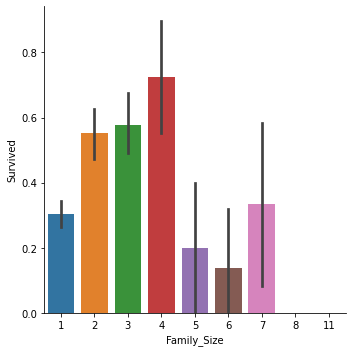

In [66]:
DEFAULT_SURVIVAL_VALUE = 0.5
dataset['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in dataset[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 0
                
for _, grp_df in dataset.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    dataset.loc[dataset['PassengerId'] == passID, 'Family_Survival'] = 0
                        

sns.catplot(x="Family_Size",y="Survived",data = dataset.iloc[:train_len],kind="bar")

# On combined dataset, we will now perform Feature Engineering

In [67]:
#create a Fareband
dataset['Fareband'] = pd.qcut(dataset['Fare'], 13)
pd.pivot_table(dataset,index='Survived',columns='Fareband', values = 'Name', aggfunc='count')

Fareband,"(-0.001, 7.25]","(7.25, 7.75]","(7.75, 7.896]","(7.896, 8.05]","(8.05, 10.5]","(10.5, 13.0]","(13.0, 15.742]","(15.742, 23.25]","(23.25, 26.55]","(26.55, 34.075]","(34.075, 56.496]","(56.496, 83.475]","(83.475, 101.0]"
Survived,,,,,,,,,,,,,
0.0,72,39,68,48,60,35,33,32,41,40,41,25,15
1.0,11,18,15,14,18,30,16,36,36,25,34,38,51


In [68]:
dataset.head()

,Age,Cabin,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,...,num_Ticket,Ticket_letters,Title,Last_Name,Ageband,Family_Size,Family_Size_Band,IsAlone,Family_Survival,Fareband
0,22.0,NaN,8,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,2,...,0,a5,4,Braund,2,2,Small,0,0.5,"(-0.001, 7.25]"
1,38.0,C85,3,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,...,0,pc,5,Cumings,7,2,Small,0,0.5,"(56.496, 83.475]"
2,26.0,NaN,8,1,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,...,0,stono2,3,Heikkinen,4,1,Alone,1,0.5,"(7.896, 8.05]"
3,35.0,C123,3,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,...,1,0,5,Futrelle,7,2,Small,0,0.0,"(34.075, 56.496]"
4,35.0,NaN,8,1,8.0500,"Allen, Mr. William Henry",0,5,3,2,...,1,0,4,Allen,7,1,Alone,1,0.5,"(7.896, 8.05]"


In [69]:
#title_mapping = {"Mr": 0, "Miss/Mrs/Ms": 1, "Master": 2, "Dr/Military/Noble/Clergy": 3}
#dataset['Title'] = dataset['Title'].map(title_mapping)

In [70]:
#sex_mapping = {"female": 0, "male": 1}
#dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [71]:
#embarked_mapping = {"S": 0, "C": 1, "Q": 2}
#dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

# Encodings

## Label Encodings

In [72]:
dataset.Fareband=encoder.fit_transform(dataset.Fareband)
dataset.Family_Size_Band=encoder.fit_transform(dataset.Family_Size_Band)

In [73]:
#remove unwanted columns part 1
dataset.drop(labels=['Cabin', 'Fare', 'Age', 'Name', 'PassengerId', 'Ticket', ], axis=1, inplace=True)

In [74]:
dataset.drop(labels=['Parch','SibSp','Survived','Last_Name'], axis=1, inplace=True)

In [75]:
dataset.drop(labels=['Ticket_letters'], axis=1, inplace=True)

In [76]:
dataset.head()

,Deck,Embarked,Pclass,Sex,num_Ticket,Title,Ageband,Family_Size,Family_Size_Band,IsAlone,Family_Survival,Fareband
0,8,1,3,2,0,4,2,2,3,0,0.5,0
1,3,2,1,1,0,5,7,2,3,0,0.5,11
2,8,1,3,1,0,3,4,1,0,1,0.5,3
3,3,1,1,1,1,5,7,2,3,0,0.0,10
4,8,1,3,2,1,4,7,1,0,1,0.5,3


In [77]:
dataset.shape

(1309, 12)

## One Hot Encode other variables

In [78]:
#created dummy variables from categories (also can use OneHotEncoder)
#dummies = pd.get_dummies(dataset[['Deck','Pclass','Sex','Fareband',
                                  #'Embarked','Ageband', 'Family_Size','Family_Size_Band','num_Ticket','Title',
                                 #'IsAlone','Family_Survival']])

In [79]:
#dummies.shape

In [80]:
#dummies.head()

In [81]:
train_df = dataset.loc[:890]
test_df = dataset.loc[891:]

In [82]:
train_df.columns

Index(['Deck', 'Embarked', 'Pclass', 'Sex', 'num_Ticket', 'Title', 'Ageband',
       'Family_Size', 'Family_Size_Band', 'IsAlone', 'Family_Survival',
       'Fareband'],
      dtype='object')

In [83]:
test_df.shape

(418, 12)

# Scaling the Dataset

In [84]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(train_df)

In [85]:
X_test=scaler.fit_transform(test_df)

In [86]:
y_train=train.Survived
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Model Building

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [88]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.7150838  0.74719101 0.79213483 0.80337079 0.81460674]
77.44774339338397


In [89]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.82122905 0.82022472 0.83707865 0.80898876 0.84269663]
82.60435628648548


In [90]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.79888268 0.78089888 0.83146067 0.76404494 0.83707865]
80.24731655263324


In [91]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.81564246 0.78651685 0.85393258 0.79213483 0.84269663]
81.81846713953928


In [92]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.82122905 0.78089888 0.84831461 0.78089888 0.86516854]
81.93019898311468


In [93]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.84916201 0.83707865 0.85955056 0.80898876 0.85955056]
84.28661100998053


In [94]:
! pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean()*100)

[0.82122905 0.78651685 0.86516854 0.79213483 0.85955056]
82.49199673592366


## Voting Classifier 

In [95]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),
                                            ('rf',rf),('gnb',gnb),('svc',svc),
                                            ('xgb',xgb),('dt',dt)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83240223 0.83146067 0.85955056 0.79775281 0.87640449]
0.8395141547925429


In [96]:
voting_clf.fit(X_train,y_train)
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')
basic_submission_vc = {'PassengerId': testing.PassengerId, 'Survived': y_hat_base_vc}
base_submission_vc = pd.DataFrame(data=basic_submission_vc)
base_submission_vc.to_csv('base_submission_votingclf.csv', index=False)

### base_submission_votingclf.csv scored '0.77990'

# Model Tuned Performance

In [97]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [98]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

# 1. Logistic Regression

In [99]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
kfold = StratifiedKFold(n_splits=8)

In [100]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = kfold, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 8 folds for each of 40 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   10.7s


Logistic Regression
Best Score: 0.8328004343629344
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   15.1s finished


In [101]:
'''Logistic Regression
Best Score: 0.8328004343629344
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}'''

"Logistic Regression\nBest Score: 0.8328004343629344\nBest Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}"

# 2. KNN

In [102]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.8s


KNN
Best Score: 0.8350072186303434
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 233 out of 240 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.7s finished


In [103]:
'''KNN
Best Score: 0.8350072186303434
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}'''
#here, we got better score for cv=5 than cv=kfold!!!

"KNN\nBest Score: 0.8350072186303434\nBest Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}"

In [104]:
y_hat_knn = clf_knn.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')
basic_submission_knn = {'PassengerId': testing.PassengerId, 'Survived': y_hat_knn}
submission_knn = pd.DataFrame(data=basic_submission_knn)
submission_knn.to_csv('submission_clf_knn.csv', index=False)

### This got me a score of 0.78468

# 3. SVC

In [105]:
'''svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

y_hat_svc = clf_svc.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv('../input/titanic/test.csv')
svc_submission = {'PassengerId': testing.PassengerId, 'Survived': y_hat_svc}
submission_svc = pd.DataFrame(data=svc_submission)
submission_svc.to_csv('submission_clf_svc.csv', index=False)'''

'''SVC
Best Score: 0.8428410018203504
Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}'''

"SVC\nBest Score: 0.8428410018203504\nBest Parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}"

In [106]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['poly'], 'degree' : [2], 'C': [10]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


SVC
Best Score: 0.8428410018203504
Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}


In [107]:
y_hat_svc = clf_svc.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')
svc_submission = {'PassengerId': testing.PassengerId, 'Survived': y_hat_svc}
submission_svc = pd.DataFrame(data=svc_submission)
submission_svc.to_csv('submission_clf_svc.csv', index=False)

### This got me a score of 0.79665 

# 4. Random Forest

## with randomized search cv to get a guess

In [108]:
'''rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,4,5,6,7,8,9,10,15,20,50,None],
                                  'max_features': [3,'auto','sqrt','log2'],
                                  'bootstrap': [False, True],
                                  'criterion': ['gini', 'entropy'],
                                  'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
                                  'min_samples_split': [2 ,3,4,5,6,7,8,9,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 200, 
cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')'''

'''y_hat_rf_rnd = clf_rf_rnd.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv('../input/titanic/test.csv')
rf_submission = {'PassengerId': testing.PassengerId, 'Survived': y_hat_rf_rnd}
submission_rf = pd.DataFrame(data=rf_submission)
submission_rf.to_csv('submission_clf_rf_rnd.csv', index=False)'''

'''Random Forest
Best Score: 0.8495762977841943
Best Parameters: {'n_estimators': 100, 'min_samples_split': 3, 
'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}'''

"Random Forest\nBest Score: 0.8495762977841943\nBest Parameters: {'n_estimators': 100, 'min_samples_split': 3, \n'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}"

In [109]:
'''#with stratified kfold
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,4,5,6,7,8,9,10,15,20,50,None],
                                  'max_features': [3,'auto','sqrt','log2'],
                                  'bootstrap': [False, True],
                                  'criterion': ['gini', 'entropy'],
                                  'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
                                  'min_samples_split': [2 ,3,4,5,6,7,8,9,10]}
                                  
clf_rf_rnd_2 = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 200, cv = kfold,
verbose = True, n_jobs = -1)
best_clf_rf_rnd_2 = clf_rf_rnd_2.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd_2,'Random Forest')'''

'''y_hat_rf_rnd_2 = clf_rf_rnd_2.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv('../input/titanic/test.csv')
rf_submission = {'PassengerId': testing.PassengerId, 'Survived': y_hat_rf_rnd_2}
submission_rf = pd.DataFrame(data=rf_submission)
submission_rf.to_csv('submission_clf_rf_rnd_2.csv', index=False)'''

'''Random Forest
Best Score: 0.8529701576576576
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 6,
'max_features': 3, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}'''

"Random Forest\nBest Score: 0.8529701576576576\nBest Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 6,\n'max_features': 3, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}"

In [110]:
#with stratified kfold
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400], 
                                  'bootstrap': [True],
                                  'max_depth': [4],
                                  'max_features': [3],
                                  'bootstrap': [True],
                                  'criterion': ['gini'],
                                  'min_samples_leaf': [6],
                                  'min_samples_split': [2]}
                                  
clf_rf_rnd_2 = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 200, cv = kfold, verbose = True, n_jobs = -1)
best_clf_rf_rnd_2 = clf_rf_rnd_2.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd_2,'Random Forest')

C:\Users\Divyansh Mathur\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=200. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   10.5s finished


Random Forest
Best Score: 0.8529701576576576
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 3, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}


In [111]:
'''Random Forest
Best Score: 0.8529701576576576
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2,
'min_samples_leaf': 6, 'max_features': 3, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}'''

"Random Forest\nBest Score: 0.8529701576576576\nBest Parameters: {'n_estimators': 400, 'min_samples_split': 2,\n'min_samples_leaf': 6, 'max_features': 3, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': True}"

In [112]:
y_hat_rf_rnd_2 = clf_rf_rnd_2.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')
submission_rf_rnd = {'PassengerId': testing.PassengerId, 'Survived': y_hat_rf_rnd_2}
submission_rf_rnd_2 = pd.DataFrame(data=submission_rf_rnd)
submission_rf_rnd_2.to_csv('submission_clf_rf_rnd_2.csv', index=False)

### This got me a score of 0.81100

## with gridsearch cv to get a much better estimate

In [113]:
'''rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,150,200,300,400,500],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [3,4,5,6],
                                  'max_features': ['sqrt'],
                                  'min_samples_leaf': [1,5,9],
                                  'min_samples_split': [2,3,4,5]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')'''

'''Random Forest
Best Score: 0.8529470843010483
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 
'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}'''

"Random Forest\nBest Score: 0.8529470843010483\nBest Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', \n'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}"

In [114]:
'''rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,200,300,400,500],
               'criterion':['gini'],
                                  'bootstrap': [False, True],
                                  'max_depth': [3,4,5,None],
                                  'max_features': ['sqrt'],
                                  'min_samples_leaf': [4,5,6,7],
                                  'min_samples_split': [1,2,3,4]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = kfold, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')'''

'''Random Forest
Best Score: 0.8541063384813385
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt',
'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}'''

"Random Forest\nBest Score: 0.8541063384813385\nBest Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt',\n'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}"

In [115]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100],
               'criterion':['gini'],
                                  'bootstrap': [True],
                                  'max_depth': [4],
                                  'max_features': ['sqrt'],
                                  'min_samples_leaf': [4],
                                  'min_samples_split': [2]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = kfold, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.7s finished


Random Forest
Best Score: 0.8541063384813385
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [116]:
'''Random Forest
Best Score: 0.8541063384813385
Best Parameters: {'bootstrap': True, 'criterion': 'gini',
'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}'''

"Random Forest\nBest Score: 0.8541063384813385\nBest Parameters: {'bootstrap': True, 'criterion': 'gini',\n'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}"

In [117]:
y_hat_rf_grid = best_clf_rf.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')
rf_submission_grid = {'PassengerId': testing.PassengerId, 'Survived': y_hat_rf_grid}
submission_rf_grid = pd.DataFrame(data=rf_submission_grid)
submission_rf_grid.to_csv('submission_clf_rf_grid.csv', index=False)

### This got me a score of 0.81100

<AxesSubplot:>

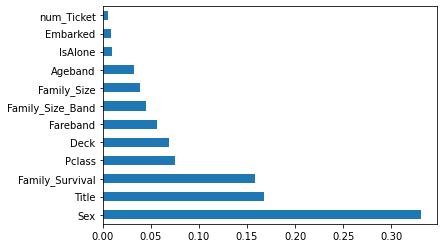

In [118]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=train_df.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [120]:
clf_rf_3=RandomForestClassifier(criterion='gini', n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=1,
                                           n_jobs=-1,
                                           verbose=1)
best_clf_rf_3 = clf_rf_3.fit(X_train,y_train)
y_hat_rf_3 = best_clf_rf_3.predict(X_test).astype(int)
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')
rf_submission_3 = {'PassengerId': testing.PassengerId, 'Survived': y_hat_rf_3}
submission_rf_3 = pd.DataFrame(data=rf_submission_3)
submission_rf_3.to_csv('submission_rf_3.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.6s finished


### This got me a score of 0.80382

# 5. XGB Classifier 

In [121]:
'''xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250,300,400, 500,600,700,1000],
    'colsample_bytree': [0.2, 0.5, 0.7,0.75, 0.8,0.85, 0.9, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2,2.5,3,4],
    'subsample': [0.5,0.55,0.6,0.65,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.05,0.1,0.2,0.3,0.5,0.6,0.7,0.9],
    'gamma':[0,.01,.1,.5,1,10,100],
    'min_child_weight':[0,.01,0.05,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 2000, 
cv = kfold, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')'''

'''XGB
Best Score: 0.8575048262548263
Best Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 
'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 700, 'min_child_weight': 0, 'max_depth': 10,
'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.75}'''

"XGB\nBest Score: 0.8575048262548263\nBest Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', \n'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 700, 'min_child_weight': 0, 'max_depth': 10,\n'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.75}"

In [122]:
'''xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [550,600,650],
    'colsample_bytree': [0.9,0.95,1],
    'max_depth': [12,15,20],
    'reg_alpha': [0.5,1],
    'reg_lambda': [0.5,1],
    'subsample': [0.85,0.9,0.95],
    'learning_rate':[0.85,0.9,0.95],
    'gamma':[8,10,12],
    'min_child_weight':[0],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = kfold, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')'''

"xgb = XGBClassifier(random_state = 1)\n\nparam_grid = {\n    'n_estimators': [550,600,650],\n    'colsample_bytree': [0.9,0.95,1],\n    'max_depth': [12,15,20],\n    'reg_alpha': [0.5,1],\n    'reg_lambda': [0.5,1],\n    'subsample': [0.85,0.9,0.95],\n    'learning_rate':[0.85,0.9,0.95],\n    'gamma':[8,10,12],\n    'min_child_weight':[0],\n    'sampling_method': ['uniform']\n}\n\nclf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = kfold, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X_train,y_train)\nclf_performance(best_clf_xgb,'XGB')"

In [123]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [700],
    'colsample_bytree': [0.75],
    'max_depth': [10],
    'reg_alpha': [0.5],
    'reg_lambda': [2],
    'subsample': [0.7],
    'learning_rate':[0.01],
    'gamma':[.01],
    'min_child_weight':[0],
    'sampling_method': ['uniform']
}

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 2000, cv = kfold, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

C:\Users\Divyansh Mathur\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=2000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    8.8s finished


XGB
Best Score: 0.8541264478764479
Best Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 700, 'min_child_weight': 0, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.75}


In [124]:
'''XGB
Best Score: 0.8575048262548263
Best Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 700, 'min_child_weight': 0, 'max_depth': 10,
'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.75}'''

"XGB\nBest Score: 0.8575048262548263\nBest Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 700, 'min_child_weight': 0, 'max_depth': 10,\n'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.75}"

In [125]:
y_hat_xgb_rnd = best_clf_xgb_rnd.best_estimator_.predict(X_test).astype(int)
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\test.csv')
xgb_submission_rnd = {'PassengerId': testing.PassengerId, 'Survived': y_hat_xgb_rnd}
submission_xgb = pd.DataFrame(data=xgb_submission_rnd)
submission_xgb.to_csv('submission_xgb_rnd.csv', index=False)

### This got me a score of 0.79425

# Model Additional Ensemble Approaches

In [126]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf
best_xgb = best_clf_xgb_rnd.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc),
                                                ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), 
                                                ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=kfold))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=kfold).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=kfold))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=kfold).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=kfold))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=kfold).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=kfold))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=kfold).mean())

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.7s finished


voting_clf_hard : [0.85714286 0.84821429 0.84821429 0.9009009  0.83783784 0.81081081
 0.81981982 0.87387387]
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.7s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.6s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


voting_clf_hard mean : 0.849601833976834
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


voting_clf_soft : [0.86607143 0.83928571 0.84821429 0.89189189 0.83783784 0.81081081
 0.81081081 0.87387387]
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished


voting_clf_soft mean : 0.8484757078507079
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.4s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


voting_clf_all : [0.85714286 0.84821429 0.84821429 0.9009009  0.83783784 0.8018018
 0.82882883 0.87387387]
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.8s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


voting_clf_all mean : 0.849601833976834
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.8s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


voting_clf_xgb : [0.85714286 0.83035714 0.84821429 0.9009009  0.83783784 0.8018018
 0.81081081 0.87387387]
Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.8s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.1s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.9s finished


voting_clf_xgb mean : 0.846243564993565


In [127]:
#in a soft voting classifier you can assign weights to some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = kfold, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test)

Fitting 8 folds for each of 7 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.5s finished


VC Weights
Best Score: 0.8518440315315315
Best Parameters: {'weights': [1, 2, 1]}


In [128]:
#Make Predictions 
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)
voting_clf_all.fit(X_train, y_train)
voting_clf_xgb.fit(X_train, y_train)

best_rf.fit(X_train, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_rf = best_rf.predict(X_test).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test).astype(int)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.2s finished


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.0s finished


In [129]:
#convert output to dataframe 
final_data = {'PassengerId': testing.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': testing.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': testing.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': testing.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': testing.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': testing.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [130]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [131]:
#prepare submission files 
submission.to_csv('submission_rf_aug.csv', index =False)
submission_2.to_csv('submission_vc_hard_aug.csv',index=False)
submission_3.to_csv('submission_vc_soft_aug.csv', index=False)
submission_4.to_csv('submission_vc_all_aug.csv', index=False)
submission_5.to_csv('submission_vc_xgb_aug.csv', index=False)

### submission_vc_xgb_aug.csv scored 0.80861
### submission_vc_all_aug.csv scored 0.81100
### submission_vc_soft_aug.csv scored 0.79904
### submission_vc_hard_aug.csv scored 0.80143
### submission_rf_aug.csv scored 0.80382

## The code which I have implemented gave me a best score of 0.81100 for Titanic Survival Kaggle Competition (between 800-1000 rank). 